# Задание 1. Загрузка данных и визуализация

В этом задании мы познакомимся подробнее с тем, как работать с табличными данными и визуализировать их.

Импорт необходимых библиотек:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

Загрузите [Wine Data Set](https://archive.ics.uci.edu/ml/datasets/wine)

Удобный способ сделать это — использовать модуль [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html).

In [ ]:
# Download dataset
data, labels = load_wine(return_X_y=True, as_frame=True)

И `data`, и `labels` — это N-мерные массивы. **Посмотрите, какие у них размеры**

In [ ]:
print(data.shape, labels.shape)

(178, 13) (178,)


И какие метки классов представлены.

In [ ]:
print(labels.unique())
print(labels)
data.columns

[0 1 2]
0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

Выведем первые 3 строки датасета.

In [ ]:
data.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


По умолчанию Pandas выводит всего 20 столбцов и 60 строк, поэтому если ваш датафрейм больше, воспользуйтесь функцией `set_option`:

```
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)
```

Текущее значение параметра можно вывести подобным образом:

```
pd.get_option("display.max_rows")
```

Выведите, какие значения сейчас, и поменяйте их так, чтобы открывался весь датафрейм.

In [ ]:
print(pd.get_option("display.max_rows"))
print(pd.get_option("display.min_rows"))
print(pd.get_option("display.max_columns"))

178
10
13


In [ ]:
pd.set_option("display.max_rows", 178)
pd.set_option("display.max_columns", 13)
pd.set_option('display.expand_frame_repr', False)





Верните значения обратно к тем, что были по умолчанию.

In [ ]:
pd.set_option("display.max_rows", 60)
pd.set_option("display.max_columns", 20)
pd.set_option('display.expand_frame_repr', True)

Выведем названия столбцов:

In [ ]:
print(data.columns)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


Чтобы посмотреть общую информацию по датафрейму и всем признакам, воспользуемся методом `info`:

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

В нашем случае все колонки имеют тип `float64`.

* **float64**: число с плавающей точкой от $4.9*10^{-324}$ до $1.8*10^{308}$, занимает 8 байт.

Кажется избыточным с учетом разброса значений в колонках. Кстати, какой он? Посмотрим на первые три колонки. Если убрать имена столбцов, то будет выведена вся статистика.

[NumPy Standard Data Types](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html#NumPy-Standard-Data-Types)

In [ ]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000000,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.812012,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.031250,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.361328,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.046875,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677734,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.828125,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Метод `describe` показывает основные статистические характеристики данных по каждому *числовому признаку*: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

**Изменить тип колонки** можно с помощью метода `astype`. Применим этот метод к признаку *alcohol* и переведём его в `float16`:

In [ ]:
data["alcohol"] = data["alcohol"].astype("float16")

Переведите 3 других признака в более подходящие типы и проверьте, что типы поменялись.

In [ ]:
data["color_intensity"] = data["color_intensity"].astype("float16")
data["od280/od315_of_diluted_wines"] = data["od280/od315_of_diluted_wines"].astype("float16")
data["proanthocyanins"] = data["proanthocyanins"].astype("float16")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float16
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float16
 9   color_intensity               178 non-null    float16
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float16
 12  proline                       178 non-null    float64
dtypes: fl

**Сортировка**

DataFrame можно отсортировать по значению какого-нибудь из признаков. Например, по *alcohol* (`ascending=False` для сортировки по убыванию):

In [ ]:
data.sort_values(by="alcohol", ascending=False).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
8,14.828125,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.980469,5.199219,1.08,2.849609,1045.0
13,14.750000,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.810547,5.398438,1.25,2.730469,1150.0
6,14.390625,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.980469,5.250000,1.02,3.580078,1290.0
46,14.382812,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.189453,4.898438,1.04,3.439453,1065.0
14,14.382812,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.960938,7.500000,1.20,3.000000,1547.0


Сортировать можно и по группе столбцов, подав список с названиями. Попробуйте.

In [ ]:
print(data.columns)
kill_bill = ['alcohol', 'malic_acid', 'ash']
data.sort_values(by=kill_bill, ascending=False).head()

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
8,14.828125,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.980469,5.199219,1.08,2.849609,1045.0
13,14.750000,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.810547,5.398438,1.25,2.730469,1150.0
6,14.390625,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.980469,5.250000,1.02,3.580078,1290.0
46,14.382812,3.59,2.28,16.0,102.0,3.25,3.17,0.27,2.189453,4.898438,1.04,3.439453,1065.0
14,14.382812,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.960938,7.500000,1.20,3.000000,1547.0


**Индексация и извлечение данных**

DataFrame можно индексировать по-разному. Для извлечения отдельного столбца можно использовать конструкцию вида `DataFrame['Name']`. Для логической индексации — `df[P(df['Name'])]`, где $P$ — это некоторое логическое условие, проверяемое для каждого элемента столбца *Name*.

Воспользуемся этим для ответа на вопрос: какое среднее содержание магния в алкоголе с крепостью ниже $12\%$?

In [ ]:
data["magnesium"][data["alcohol"] <= 12].mean()

95.68181818181819

Pandas позволяет комбинировать условия через логические операции. Сформулируйте какое-нибудь составное условие.

In [ ]:
data["magnesium"][(data["alcohol"] <= 12) | (data["ash"] > 1)].mean()

99.74157303370787

**Применение функций к ячейкам, столбцам и строкам**

Применение функции **к каждому столбцу**: `apply`.




In [ ]:
data.apply(np.max)

alcohol                           14.828125
malic_acid                         5.800000
ash                                3.230000
alcalinity_of_ash                 30.000000
magnesium                        162.000000
total_phenols                      3.880000
flavanoids                         5.080000
nonflavanoid_phenols               0.660000
proanthocyanins                    3.580078
color_intensity                   13.000000
hue                                1.710000
od280/od315_of_diluted_wines       4.000000
proline                         1680.000000
dtype: float64

Метод apply можно использовать и для того, чтобы применить функцию к каждой строке. Для этого нужно указать `axis=1`. Попробуйте.

In [ ]:
data.apply(np.max, axis=1)

0      1065.0
1      1050.0
2      1185.0
3      1480.0
4       735.0
        ...  
173     740.0
174     750.0
175     835.0
176     840.0
177     560.0
Length: 178, dtype: float64

Применение функции **к каждой ячейке** столбца: `map`.

Например, метод map можно использовать для замены значений в колонке, передав ему в качестве аргумента словарь вида `{old_value: new_value}`.

In [ ]:
d = {2: "low", 3: "low"}
data["ash"] = data["ash"].map(d)
data.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.226562,1.71,NaN,15.6,127.0,2.80,3.06,0.28,2.289062,5.640625,1.04,3.919922,1065.0
1,13.203125,1.78,NaN,11.2,100.0,2.65,2.76,0.26,1.280273,4.378906,1.05,3.400391,1050.0


Попробуйте какую-нибудь свою замену. Например, вы можете подать **lambda-функцию**.

[Лямбда-функции в Python](https://habr.com/ru/companies/piter/articles/674234/)

In [ ]:
double = lambda x: x*2
data['alcohol'] = data['alcohol'].map(double)
data.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,28.453125,1.71,NaN,15.6,127.0,2.80,3.06,0.28,2.289062,5.640625,1.04,3.919922,1065.0
1,26.406250,1.78,NaN,11.2,100.0,2.65,2.76,0.26,1.280273,4.378906,1.05,3.400391,1050.0


**Группировка данных**

В общем случае группировка данных в Pandas выглядит следующим образом:

`df.groupby(by=grouping_columns)[columns_to_show].function()`

Например, выведем статистики по трём столбцам в зависимости от значения признака alcohol.

In [ ]:
columns_to_show = ["malic_acid", "total_phenols", "proanthocyanins"]

data.groupby(["alcohol"])[columns_to_show].describe(percentiles=[])

malic_acid                                   total_phenols                                     proanthocyanins                                                 
               count  mean       std   min   50%   max         count   mean       std   min    50%   max           count      mean      std       min       50%       max
alcohol                                                                                                                                                                  
22.062500        1.0  1.51       NaN  1.51  1.51  1.51           1.0  2.460       NaN  2.46  2.460  2.46             1.0  2.009766      NaN  2.009766  2.009766  2.009766
22.812500        1.0  0.74       NaN  0.74  0.74  0.74           1.0  2.480       NaN  2.48  2.480  2.48             1.0  1.440430      NaN  1.440430  1.440430  1.440430
22.906250        1.0  2.40       NaN  2.40  2.40  2.40           1.0  2.900       NaN  2.90  2.900  2.90             1.0  1.830078      NaN  1.830078  1.830078  1.830078
22.921875        1.0  3.74       NaN  3.74  3.74  3.74           1.0  3.180       NaN  3.18  3.180  3.18             1.0  3.580078      NaN  3.580078  3.580078  3.580078
23.125000        1.0  2.05       NaN  2.05  2.05  2.05           1.0  3.180       NaN  3.18  3.180  3.18             1.0  1.870117      NaN  1.870117  1.870117  1.870117
...              ...   ...       ...   ...   ...   ...           ...    ...       ...   ...    ...   ...             ...       ...      ...       ...       ...       ...
28.734375        1.0  1.95       NaN  1.95  1.95  1.95           1.0  3.850       NaN  3.85  3.850  3.85             1.0  2.179688      NaN  2.179688  2.179688  2.179688
28.765625        2.0  2.73  1.216224  1.87  2.73  3.59           2.0  3.275  0.035355  3.25  3.275  3.30             2.0  2.574219  0.54541  2.189453  2.575195  2.960938
28.781250        1.0  1.87       NaN  1.87  1.87  1.87           1.0  2.500       NaN  2.50  2.500  2.50             1.0  1.980469      NaN  1.980469  1.980469  1.980469
29.500000        1.0  1.73       NaN  1.73  1.73  1.73           1.0  3.100       NaN  3.10  3.100  3.10             1.0  2.810547      NaN  2.810547  2.810547  2.810547
29.656250        1.0  1.64       NaN  1.64  1.64  1.64           1.0  2.800       NaN  2.80  2.800  2.80             1.0  1.980469      NaN  1.980469  1.980469  1.980469

[126 rows x 18 columns]

Сделаем то же самое, но немного по-другому, передав в `agg()` список функций:

In [ ]:
data.groupby(["alcohol"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

malic_acid                       total_phenols                       proanthocyanins                              
                mean       std   min   max          mean       std   min   max            mean       std       min       max
alcohol                                                                                                                     
22.062500       1.51       NaN  1.51  1.51         2.460       NaN  2.46  2.46        2.009766       NaN  2.009766  2.009766
22.812500       0.74       NaN  0.74  0.74         2.480       NaN  2.48  2.48        1.440430       NaN  1.440430  1.440430
22.906250       2.40       NaN  2.40  2.40         2.900       NaN  2.90  2.90        1.830078       NaN  1.830078  1.830078
22.921875       3.74       NaN  3.74  3.74         3.180       NaN  3.18  3.18        3.580078       NaN  3.580078  3.580078
23.125000       2.05       NaN  2.05  2.05         3.180       NaN  3.18  3.18        1.870117       NaN  1.870117  1.870117
...              ...       ...   ...   ...           ...       ...   ...   ...             ...       ...       ...       ...
28.734375       1.95       NaN  1.95  1.95         3.850       NaN  3.85  3.85        2.179688       NaN  2.179688  2.179688
28.765625       2.73  1.216224  1.87  3.59         3.275  0.035355  3.25  3.30        2.575195  0.545522  2.189453  2.960938
28.781250       1.87       NaN  1.87  1.87         2.500       NaN  2.50  2.50        1.980469       NaN  1.980469  1.980469
29.500000       1.73       NaN  1.73  1.73         3.100       NaN  3.10  3.10        2.810547       NaN  2.810547  2.810547
29.656250       1.64       NaN  1.64  1.64         2.800       NaN  2.80  2.80        1.980469       NaN  1.980469  1.980469

[126 rows x 12 columns]

Когда данных много, просто смотреть на цифры крайне неинформативно.

Для визуализации данных в этом курсе мы будем использовать библиотеку `matplotlib`. **Давайте её импортируем**.

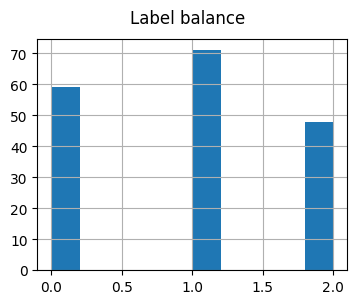

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(4, 3))
labels.hist()
plt.suptitle("Label balance")
plt.show()

Объединим данные и метки в один фрейм. Нам это потребуется для упрощения визуализации.

In [ ]:
df = pd.concat([data, labels], axis=1)

Теперь мы можем посмотреть, как меняется средняя крепость алкоголя в зависимости от значения метки в *target*. Реализация функции `plot` в `pandas` основана на библиотеке `matplotlib`.

Здесь `show()` позволяет нам убрать служебные сообщения.

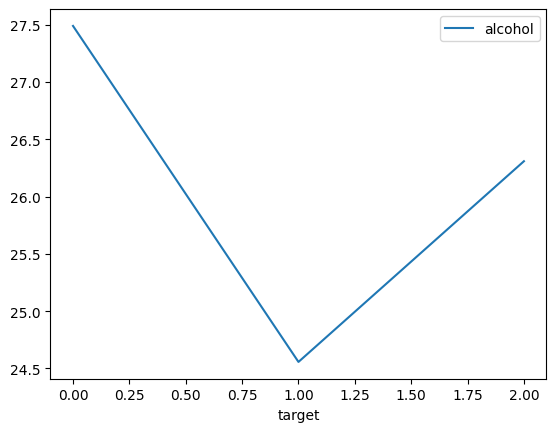

In [ ]:
df.groupby("target")["alcohol"].mean().plot(legend=True)
plt.show()

C помощью параметра `kind` можно изменить тип графика, например, на **bar chart**. `Matplotlib` позволяет очень гибко настраивать графики. На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры. Например, параметр `rot` отвечает за угол наклона подписей к оси `x`

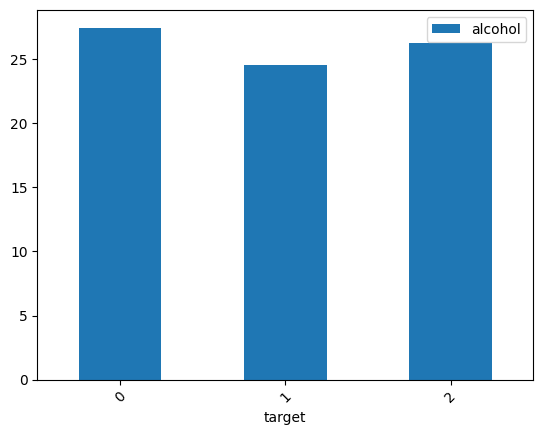

In [ ]:
df.groupby("target")["alcohol"].mean().plot(kind="bar", legend=True, rot=45)
plt.show()

**Seaborn**

Теперь давайте перейдем к библиотеке `seaborn`. `Seaborn` — более высокоуровневое API на базе библиотеки `matplotlib`. `Seaborn` содержит более адекватные дефолтные настройки оформления графиков. Также в библиотеке есть достаточно сложные типы визуализации, которые в `matplotlib` потребовали бы большого количество кода.

Познакомимся с первым таким "сложным" типом графиков — pair plot (scatter plot matrix). Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки.

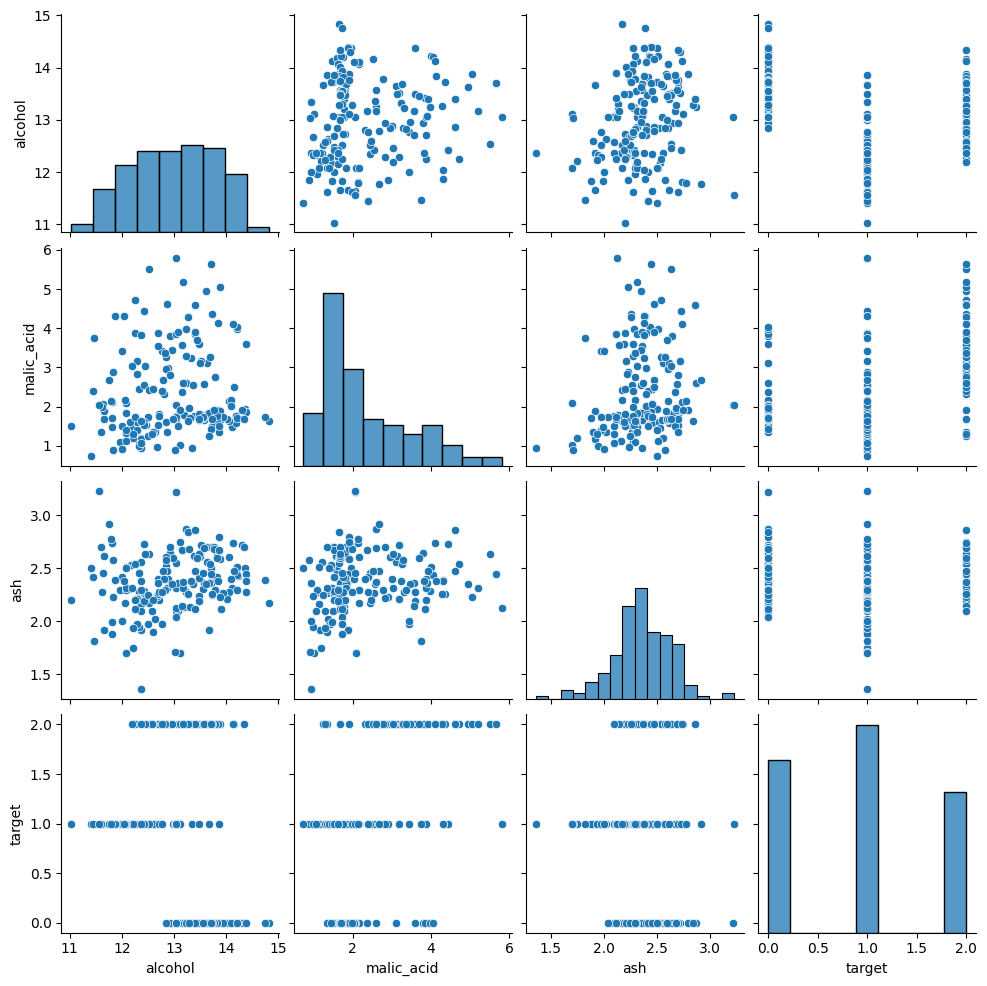

In [ ]:
import seaborn as sns

data, labels = load_wine(return_X_y=True, as_frame=True)
df = pd.concat([data, labels], axis=1)
cols = ["alcohol", "malic_acid", "ash", "target"]
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig("pairplot.png")

Как можно видеть, на диагонали матрицы графиков расположены гистограммы распределений признака. Остальные же графики — это обычные `scatter plots` для соответствующих пар признаков.

Для сохранения графиков в файлы стоит использовать метод `savefig`.

Выведите аналогичный график по иным 5 колонкам.

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


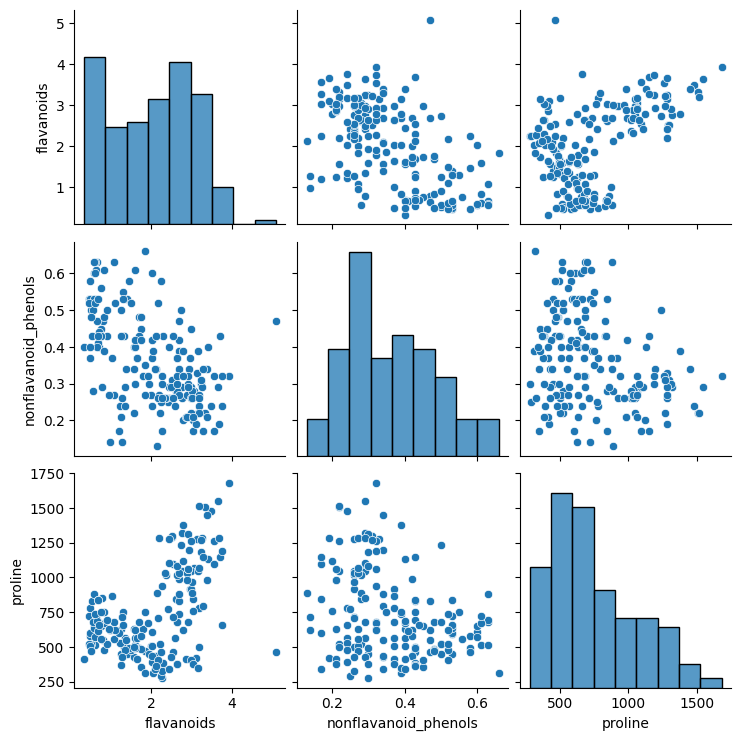

In [ ]:
import seaborn as sns

print(data.columns)

data, labels = load_wine(return_X_y=True, as_frame=True)
df = pd.concat([data, labels], axis=1)
cols = ['flavanoids', 'nonflavanoid_phenols', 'proline']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig("pairplot.png")

С помощью `seaborn` можно построить и распределение dist plot. Для примера посмотрим на распределение `color_intensity`. Обратите внимание, что так тоже можно обращаться к колонкам.

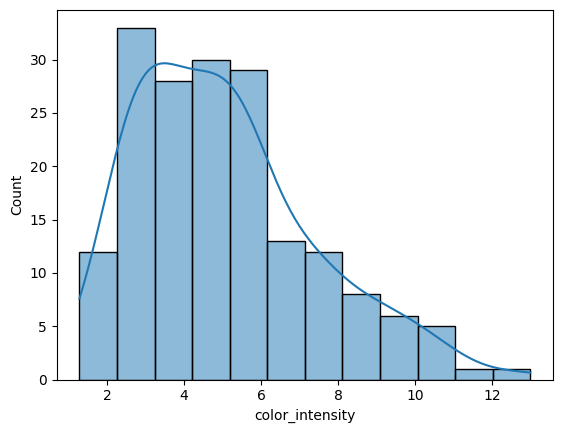

In [ ]:
sns.histplot(df.color_intensity, kde=True)
plt.show()

Для того, чтобы посмотреть на диапазон и распределение данных, используется `box plot`. Посмотрим на то, как связаны между собой 5 наиболее часто встречаемых крепостей напитков и `flavanoids`.

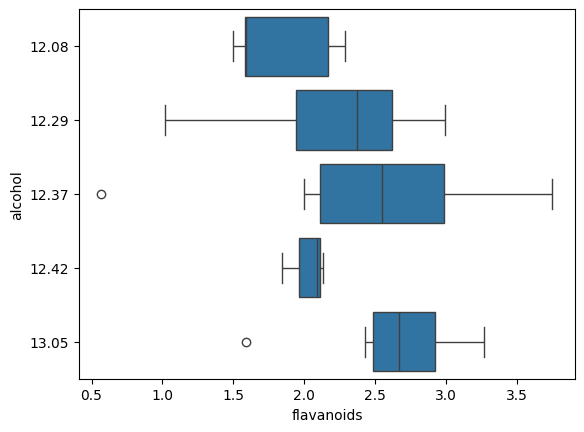

In [ ]:
top_alcohol = (
    df.alcohol.value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="alcohol", x="flavanoids", data=df[df.alcohol.isin(top_alcohol)], orient="h"
)
plt.show()

`Box plot` состоит из коробки (поэтому он и называется `box plot`), усов и точек (иначе его называют *ящик с усами*). Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили. Черта внутри коробки обозначает медиану распределения.

Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток ($Q1 - 1.5*IQR$, $Q3 + 1.5*IQR$), где $IQR = Q3 - Q1$ — интерквартильный размах. Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика.

[[wiki] Box plot](https://en.wikipedia.org/wiki/Box_plot)

**Постройте свой ящик с усами!** Для этого выберите какую-нибудь подвыборку данных, которую можно визуально анализировать.

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


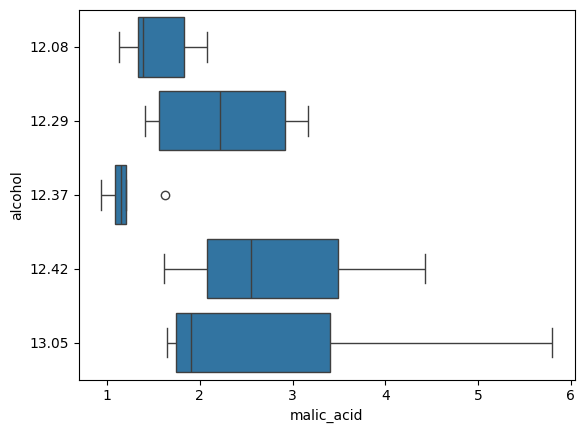

In [ ]:
print(data.columns)

top_alcohol = (
    df.alcohol.value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="alcohol", x="malic_acid", data=df[df.alcohol.isin(top_alcohol)], orient="h"
)
plt.show()

Последний график, который рассмотрим в этом задании — это **heat map**. Сгруппируем значения крепости в 5 бинов (примерно такой же подход при построении гистограмм), и посмотрим на распределение численного признака (`proanthocyanins`) по двум категориальным.

In [ ]:
df["alcoholGroup"] = pd.cut(df["alcohol"], bins=5)

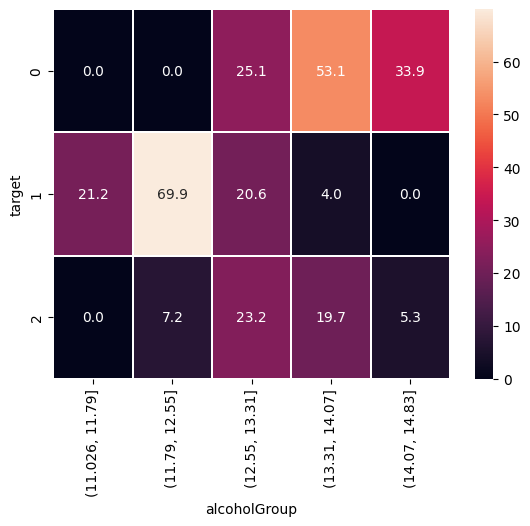

In [ ]:
platform_genre_sales = (
    df.pivot_table(
        index="target", columns="alcoholGroup", values="proanthocyanins", aggfunc=sum
    )
    .fillna(0)
    .applymap(float)
)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.05)
plt.show()

Постройте аналогичную тепловую карту. Быть может, вы ожидаете какие-то закономерности?

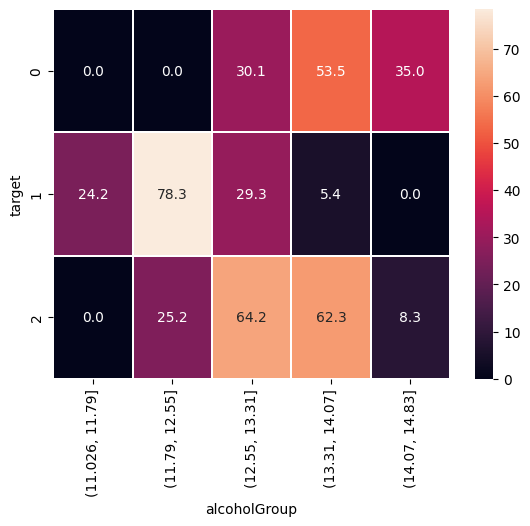

In [ ]:
platform_genre_sales = (
    df.pivot_table(
        index="target", columns="alcoholGroup", values="malic_acid", aggfunc=sum
    )
    .fillna(0)
    .applymap(float)
)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.05)

plt.show()

В дальнейших лекциях и заданиях на основе подобных визуализаций и подсчётов вы будете производить разведочный анализ и строить гипотезы о том, какой **baseline** можно получить, выведя грубую (или не очень) связь между данными и целевой переменной.

В следующем задании вы продложите анализ датасета.

## Формат результата

Результат выполнения — таблицы и графики.

# Задание 2. Кросс-валидация

Напишите свою реализацию кросс-валидации, используя только библиотеку `numpy`. Обучите модель `KNeighborsClassifier` с параметрами `n_neighbors=3, metric='euclidean'` с помощью кросс-валидации, получите значения `accuracy` по всем 5 фолдам.

## Формат результата

Результат выполнения — значения метрики `accuracy` для пяти фолдов c использованием разных способов.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import numpy as np


iris = load_iris()
x, y = iris.data, iris.target


def in_take(index_arr, arr):

  new_arr = []

  for i in range(len(index_arr)):

    new_arr.append(arr[index_arr])




model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

def custom_cv(num_folds, x, y, model, metric=accuracy_score):

    np.random.seed(42)

    index_arr = np.arange(1, len(y)+1)
    index = {}
    flag = 0
    delta = (len(y) // num_folds)


    for i in range (1, num_folds + 1):
      index[i] = index_arr[flag:flag+delta]
      flag = flag + delta


    for i in range(num_folds):

      x_val = index[i]



     model.fit(x_train, y_train)
#         predictions = model.predict(x_val)
#         score = metric(y_val, predictions)
#         results.append(score)
#         print(f'Accuracy for fold {i + 1}: {score}')


    print(index)

custom_cv(5, x, y, model)

#     for i in range(num_folds):


#         model.fit(x_train, y_train)
#         predictions = model.predict(x_val)
#         score = metric(y_val, predictions)
#         results.append(score)
#         print(f'Accuracy for fold {i + 1}: {score}')

#     return np.array(results)

# results = custom_cv(5, x, y, model)
# print('Mean: ', results.mean())

{1: array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), 2: array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]), 3: array([61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]), 4: array([ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120]), 5: array([121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150])}


Теперь сделайте кросс-валидацию, используя `KFold` из `sklearn.model_selection`:

In [ ]:
from sklearn.model_selection import KFold

np.random.seed(42)

def custom_cv_1(num_folds, x, y, model, metric=accuracy_score):

    results = []
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    for i, (train_indices, val_indices) in enumerate(kf.split(x)):

        x_train, y_train = x[train_indices], y[train_indices]
        y_val, x_val = y[val_indices], x[val_indices]
        model.fit(x_train, y_train)
        predictions = model.predict(x_val)
        score = metric(y_val, predictions)
        results.append(score)
        print(f'Accuracy for fold {i + 1}: {score}')

    return np.array(results)

results = custom_cv_1(5, x, y, model)
print('Mean: ', results.mean())

Accuracy for fold 1: 1.0
Accuracy for fold 2: 0.9666666666666667
Accuracy for fold 3: 0.9666666666666667
Accuracy for fold 4: 0.9333333333333333
Accuracy for fold 5: 0.9666666666666667
Mean:  0.9666666666666668


Теперь используйте `cross_val_score` или `cross_validate`:

In [ ]:
from sklearn.model_selection import cross_val_score

cv = KFold(5, random_state=42, shuffle=True)
results = cross_val_score(model, x, y, cv=cv)

print(results.mean())

0.9666666666666668


# Задание 3. Метрики классификации

Чаще всего модели, с которыми вы будете работать для задачи классификации, будут выдавать вероятность принадлежности к классу. Стандартный порог для задачи классификации — 0.5, но бывают ситуации, когда порог можно подобрать лучше. Подберем разные пороги и посчитаем метрики при различных порогах.

## Формат результата

Подобранный порог, при котором `f1-score` максимальный, и значения метрик при разных порогах

Загрузите предсказания модели:

In [ ]:
import pandas as pd

df_tmp = pd.read_csv('https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/y_pred_proba.csv')
df_tmp

,y_pred,y_true
0,0.010604,0
1,0.085969,0
2,0.257839,1
3,0.163190,0
4,0.210487,0
...,...,...
195,0.748444,1
196,0.536695,1
197,0.567285,1
198,0.823948,1


Посчитайте `classification_report` при пороге 0.5:

In [ ]:
df_tmp["y_pred_05"] = df_tmp["y_pred"].apply(lambda x: 1 if x >= 0.5 else 0)

In [ ]:
from sklearn.metrics import classification_report

y_true = df_tmp['y_true']
y_pred = df_tmp['y_pred_05']

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.59      0.96      0.73        82
           1       0.95      0.53      0.68       118

    accuracy                           0.71       200
   macro avg       0.77      0.75      0.71       200
weighted avg       0.80      0.71      0.70       200



Нарисуйте распределение классов, используя `sns.histplot`:

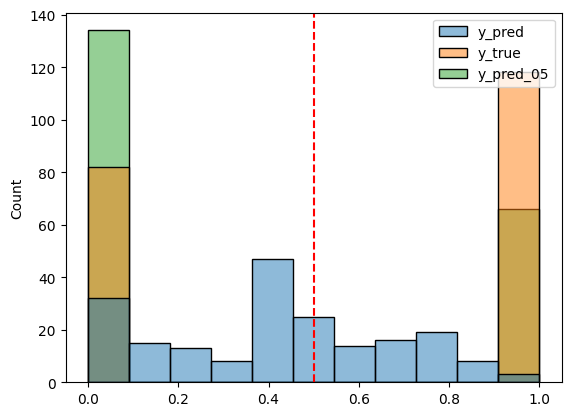

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_tmp)
plt.axvline(x=0.5, c="r", linestyle="--")
plt.show()


Видно, что оптимальный порог находится ниже 0.5, но подбирать его по графику довольно проблематично, воспользуемся `precision_recall_curve`:

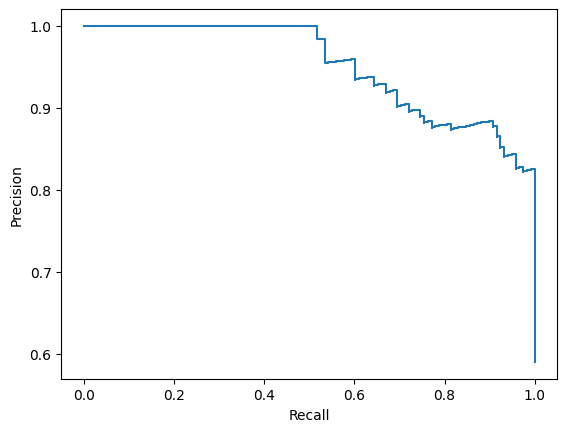

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, thresholds = precision_recall_curve(df_tmp['y_true'], df_tmp['y_pred'])

pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot()
plt.show()

Теперь у нас есть все значения `precision` и `recall` при всех порогах. Посчитайте `f1-score` и выберите порог, при котором `f1-score` максимален:

In [ ]:
import numpy as np

f1 = 2*(precision*recall) / (precision + recall)
best_f1_index = f1.argmax()
best_threshold = thresholds[best_f1_index]

print(best_f1_index)
print(best_threshold)

57
0.2578390429251129


Отобразите новый порог на графике:

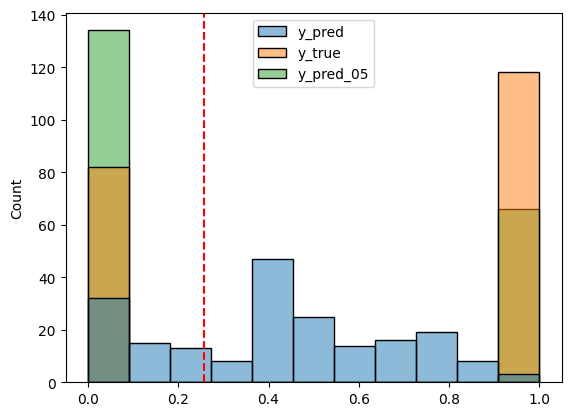

In [ ]:
sns.histplot(df_tmp)
plt.axvline(x=thresholds[best_f1_index], c="r", linestyle="--")
plt.show()

Посчитайте `classification_report` с новым порогом:

In [ ]:
df_tmp['y_pred_best'] = # Your code here

# Your code here

# Задание 4. Реализация k-NN

В этом задании мы поработаем в концепии ОПП (Объектно-Ориентированного Программирования).  Реализуйте алгоритм k-NN для изображений и примените его.

[ООП на Python: концепции, принципы и примеры реализации](https://proglib.io/p/python-oop)


Импорт необходимых библиотек:

In [ ]:
import numpy as np
from scipy.stats import mode
from torchvision import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Функция, которая считает расстояние L1 между 2-мя векторами:

In [ ]:
def compute_L1(a, b):
    return  # Your code here

Загрузите датасет CIFAR-10 и разбейте его на тренировочный, валидационный и тестовый наборы. Укажите аргументы `random_state=42`, `stratify`.

In [ ]:
dataset = datasets.CIFAR10("content", train=True, download=True)

np.random.seed(42)
data, _, labels, _ = train_test_split(
    dataset.data / 255,  # Normalize
    np.array(dataset.targets),
    train_size=0.1,  # get only fraction of the dataset
    random_state=42,
    stratify=dataset.targets,
)

# Your code here

Создайте класс k-NN и реализуйте его методы.

In [ ]:
class kNN:
    def __init__(self, k, distance_func):
        self.k = # Your code here
        self.distance_func = # Your code here

    def fit(self, x, y):
        self.train_data = # Your code here
        self.train_labels = # Your code here

    def predict(self, x):
        distances = self.compute_distances(x)
        indexes = np.argsort(distances, axis=1)[:, :self.k]
        labels_of_top_classes = self.train_labels[indexes]
        predicted_class, _ = mode(labels_of_top_classes, axis=1, keepdims=True)
        return predicted_class.flatten()

    def compute_distances(self, test):
        # Your code here

        return distances

In [ ]:
kNN_classifier = kNN(k=1, distance_func=compute_L1)
kNN_classifier.fit(x=x_train, y=y_train)
out = kNN_classifier.predict(x_test)

In [ ]:
np.mean(y_test == out)

Сравните время работы вашей реализации и реализации из sklearn. Используйте `%%time`.

In [ ]:
# Your code here

In [ ]:
# Your code here

In [ ]:
# Your code here

**Оптимальный k-NN. Погружение в ООП**

Эта часть задания даёт дополнительные баллы и не обязательна к выполнению.

* Реализуйте выбор ближайших соседей эффективно. Можно сделать [KD дерево](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree), таким образом мы приблизимся к библиотечной реализации.

   [[wiki] K-d tree](https://en.m.wikipedia.org/wiki/K-d_tree).

   Сравните по эффективности как с исходной (простой) реализацией, так и с библиотечной.

* *Примечание*. Предполагается, что вы самостоятельно реализуете алгоритм.

На практике метод ближайших соседей для классификации используется редко.
Проблема заключается в следующем.

Предположим, что точность классификации нас устраивает. Применим k-NN на больших данных (e.g. миллион картинок). Для определения класса каждой из картинок необходимо сравнить ее со всеми другими картинками в базе данных, а такие расчеты, даже в существенно оптимизированном виде, занимают много времени.

Тем не менее, метод ближайших соседей используется в других задачах, где без него обойтись сложно. Например, **в задаче распознавания лиц**. Представим, что у нас есть большая база данных с фотографиями лиц (например, по 5 разных фотографий всех сотрудников, которые работают в офисном здании) и есть камера, установленная на входе в это здание. Мы хотим узнать, кто и во сколько пришел на работу. Для того, чтобы понять, кто прошел перед камерой, нам нужно зафиксировать лицо этого человека и сравнить его со всеми фотографиями лиц в базе. В такой формулировке мы не пытаемся определить конкретный класс фотографии, а всего лишь определяем **“похож-не похож”**. Мы смотрим на k ближайших соседей, и если из k соседей, 5 — это фотографии, например, Джеки Чана, то, скорее всего, под камерой прошел именно он.



Примеры эффективной реализации метода на основе k-NN:
* [[git] 🐾 Facebook AI Research Similarity Search](https://github.com/facebookresearch/faiss) – разработка команды Facebook AI Research для быстрого поиска ближайших соседей и кластеризации в векторном пространстве. Высокая скорость поиска позволяет работать с очень большими данными – до нескольких миллиардов векторов.
* [[arxiv] 🎓 Hierarchical Navigable Small World](https://arxiv.org/abs/1603.09320) — алгоритм поиска ближайших соседей.

In [ ]:
# Your code here

## Формат результата

Демонстрация времени работы вашей реализации и реализации из sklearn (с помощью %%time)